In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import torch.nn as nn
from torchvision.models import resnet18, alexnet, mnasnet0_5
from torchvision.models import resnet50, inception_v3, densenet121, mobilenet_v2, convnext_base
import torch.optim as optim
from torch_funcs import fit, test, get_cifar10_loaders

# check same models for pt and tf
# from torchvision.models import resnet50, inception_v3, densenet121, mobilenet_v2, convnext_base
# import tensorflow as tf
# tf.keras.applications.ResNet50 # 2015
# tf.keras.applications.InceptionV3 # 2016
# tf.keras.applications.DenseNet121 # 2018
# tf.keras.applications.MobileNetV2 # 2019
# tf.keras.applications.ConvNeXtBase # 2020

In [2]:
# config
batch_size = 16
test_batch_size = 32
epochs = 2
lr = 1e-3
momentum = 0.9
loss_func = F.cross_entropy
num_classes = 10

use_cuda = torch.cuda.is_available()
device = torch.device("cuda"
                      if use_cuda
											else "cpu"
										)
print(f'CUDA enabled: {use_cuda}')

train_dl, test_dl = get_cifar10_loaders(batch_size, test_batch_size)

# for m in model.modules(): print(m)

CUDA enabled: True
Files already downloaded and verified
Files already downloaded and verified


In [ ]:
model = resnet50()
model.fc = nn.Linear(in_features=2048, out_features=num_classes, bias=True)
model = model.to(device)

opt = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

train_history = []
acc_history = []

print('ResNet50')
for epoch in range(1, epochs + 1):
	train_history.extend( fit(model, device, train_dl, loss_func, epoch, optimizer=opt, silent=False) )
	acc_history.append( test(model, device, test_dl, loss_func, silent=True) )

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12.8, 4.8)

ax1.plot(train_history)
ax1.set_title('Training history of ResNet50')

ax2.plot(acc_history)
ax2.set_title('Accuracy history of ResNet50')

del model, opt, train_history, acc_history # explicit deletion as GC doesn't seem to free VRAM

In [3]:
model = densenet121()
model.classifier = nn.Linear(in_features=1024, out_features=num_classes, bias=True)
model = model.to(device)

opt = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

train_history = []
acc_history = []

print('Densenset-121')
for epoch in range(1, epochs + 1):
	train_history.extend( fit(model, device, train_dl, loss_func, epoch, optimizer=opt, silent=False) )
	acc_history.append( test(model, device, test_dl, loss_func, silent=True) )

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12.8, 4.8)

ax1.plot(train_history)
ax1.set_title('Training history of Densenset-121')

ax2.plot(acc_history)
ax2.set_title('Accuracy history of Densenset-121')

del model, opt, train_history, acc_history # explicit deletion as GC doesn't seem to free VRAM

Densenset-121


OutOfMemoryError: CUDA out of memory. Tried to allocate 26.00 MiB (GPU 0; 1.95 GiB total capacity; 885.44 MiB already allocated; 27.25 MiB free; 932.00 MiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [3]:
model_R = resnet18()
model_R.fc = nn.Linear(in_features=512, out_features=10)
model_R = model_R.to(device)

model_A = alexnet()
model_A.classifier[4] = nn.Linear(in_features=4096, out_features=1024) # gradual change in hopes of reducing overfitting
model_A.classifier[6] = nn.Linear(in_features=1024, out_features=10)
model_A = model_A.to(device)

model_M = mnasnet0_5()
model_M.classifier[1] = nn.Linear(in_features=1280, out_features=10, bias=True)
model_M.to(device)

optimizer_R = optim.SGD(model_R.parameters(), lr=lr, momentum=momentum)
optimizer_A = optim.SGD(model_A.parameters(), lr=lr, momentum=momentum)
optimizer_M = optim.SGD(model_M.parameters(), lr=lr, momentum=momentum)

Important thing to remember here is that several nets (such as AlexNet for example) cannot work on CIFAR-10 dataset
direclty as 32x32 images are too small. That's why `get_cifar10_loaders` internally resizes all pictures t0 224x224
pixels to meet the requirements as suggested [here](https://discuss.pytorch.org/t/given-input-size-256x1x1-calculated-output-size-256x0x0/40941). 
This parameter might change for an even bigger multiple of 32 since not all nets have been tested yet.  
  
This input transform shall be repeated for all technologies examined in this paper.

In [4]:
train_dl, test_dl = get_cifar10_loaders(batch_size, test_batch_size)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
train_history_M = []
acc_history_M = []

print('MNASNet 0.5')
for epoch in range(1, epochs + 1):
	train_history_M.extend( fit(model_M, device, train_dl, loss_func, epoch, optimizer=optimizer_M, silent=False) )
	acc_history_M.append( test(model_M, device, test_dl, loss_func, silent=True) )

del model_M

MNASNet 0.5
Train Epoch: 1 -> batch: 99 [1584/50000 (3%)]	Loss: 2.293047
Train Epoch: 1 -> batch: 199 [3184/50000 (6%)]	Loss: 2.120674
Train Epoch: 1 -> batch: 299 [4784/50000 (10%)]	Loss: 1.948806
Train Epoch: 1 -> batch: 399 [6384/50000 (13%)]	Loss: 1.879096
Train Epoch: 1 -> batch: 499 [7984/50000 (16%)]	Loss: 1.857411
Train Epoch: 1 -> batch: 599 [9584/50000 (19%)]	Loss: 1.790513
Train Epoch: 1 -> batch: 699 [11184/50000 (22%)]	Loss: 1.808570
Train Epoch: 1 -> batch: 799 [12784/50000 (26%)]	Loss: 1.724382
Train Epoch: 1 -> batch: 899 [14384/50000 (29%)]	Loss: 1.748509
Train Epoch: 1 -> batch: 999 [15984/50000 (32%)]	Loss: 1.677745
Train Epoch: 1 -> batch: 1099 [17584/50000 (35%)]	Loss: 1.705007
Train Epoch: 1 -> batch: 1199 [19184/50000 (38%)]	Loss: 1.683041
Train Epoch: 1 -> batch: 1299 [20784/50000 (42%)]	Loss: 1.640687
Train Epoch: 1 -> batch: 1399 [22384/50000 (45%)]	Loss: 1.629940
Train Epoch: 1 -> batch: 1499 [23984/50000 (48%)]	Loss: 1.583878
Train Epoch: 1 -> batch: 1599 [2

In [6]:
train_history_R = []
acc_history_R = []

print('RESNET18')
for epoch in range(1, epochs + 1):
	train_history_R.extend( fit(model_R, device, train_dl, loss_func, epoch, optimizer=optimizer_R, silent=False) )
	acc_history_R.append( test(model_R, device, test_dl, loss_func, silent=True) )

del model_R

RESNET18
Train Epoch: 1 -> batch: 99 [1584/50000 (3%)]	Loss: 2.202425
Train Epoch: 1 -> batch: 199 [3184/50000 (6%)]	Loss: 2.007724
Train Epoch: 1 -> batch: 299 [4784/50000 (10%)]	Loss: 1.873205
Train Epoch: 1 -> batch: 399 [6384/50000 (13%)]	Loss: 1.800406
Train Epoch: 1 -> batch: 499 [7984/50000 (16%)]	Loss: 1.801362
Train Epoch: 1 -> batch: 599 [9584/50000 (19%)]	Loss: 1.741649
Train Epoch: 1 -> batch: 699 [11184/50000 (22%)]	Loss: 1.692373
Train Epoch: 1 -> batch: 799 [12784/50000 (26%)]	Loss: 1.696569
Train Epoch: 1 -> batch: 899 [14384/50000 (29%)]	Loss: 1.680824
Train Epoch: 1 -> batch: 999 [15984/50000 (32%)]	Loss: 1.619471
Train Epoch: 1 -> batch: 1099 [17584/50000 (35%)]	Loss: 1.588975
Train Epoch: 1 -> batch: 1199 [19184/50000 (38%)]	Loss: 1.543345
Train Epoch: 1 -> batch: 1299 [20784/50000 (42%)]	Loss: 1.505918
Train Epoch: 1 -> batch: 1399 [22384/50000 (45%)]	Loss: 1.539508
Train Epoch: 1 -> batch: 1499 [23984/50000 (48%)]	Loss: 1.484130
Train Epoch: 1 -> batch: 1599 [2558

In [7]:
train_history_A = []
acc_history_A = []

print('ALEXNET')
for epoch in range(1, epochs + 1):
	train_history_A.extend( fit(model_A, device, train_dl, loss_func, epoch, optimizer=optimizer_A, silent=False) )
	acc_history_A.append( test(model_A, device, test_dl, loss_func, silent=True) )

del model_A

ALEXNET
Train Epoch: 1 -> batch: 99 [1584/50000 (3%)]	Loss: 2.302963
Train Epoch: 1 -> batch: 199 [3184/50000 (6%)]	Loss: 2.302717
Train Epoch: 1 -> batch: 299 [4784/50000 (10%)]	Loss: 2.302681
Train Epoch: 1 -> batch: 399 [6384/50000 (13%)]	Loss: 2.302181
Train Epoch: 1 -> batch: 499 [7984/50000 (16%)]	Loss: 2.301607
Train Epoch: 1 -> batch: 599 [9584/50000 (19%)]	Loss: 2.301924
Train Epoch: 1 -> batch: 699 [11184/50000 (22%)]	Loss: 2.302190
Train Epoch: 1 -> batch: 799 [12784/50000 (26%)]	Loss: 2.302199
Train Epoch: 1 -> batch: 899 [14384/50000 (29%)]	Loss: 2.301821
Train Epoch: 1 -> batch: 999 [15984/50000 (32%)]	Loss: 2.302664
Train Epoch: 1 -> batch: 1099 [17584/50000 (35%)]	Loss: 2.302035
Train Epoch: 1 -> batch: 1199 [19184/50000 (38%)]	Loss: 2.301299
Train Epoch: 1 -> batch: 1299 [20784/50000 (42%)]	Loss: 2.299873
Train Epoch: 1 -> batch: 1399 [22384/50000 (45%)]	Loss: 2.299501
Train Epoch: 1 -> batch: 1499 [23984/50000 (48%)]	Loss: 2.295796
Train Epoch: 1 -> batch: 1599 [25584

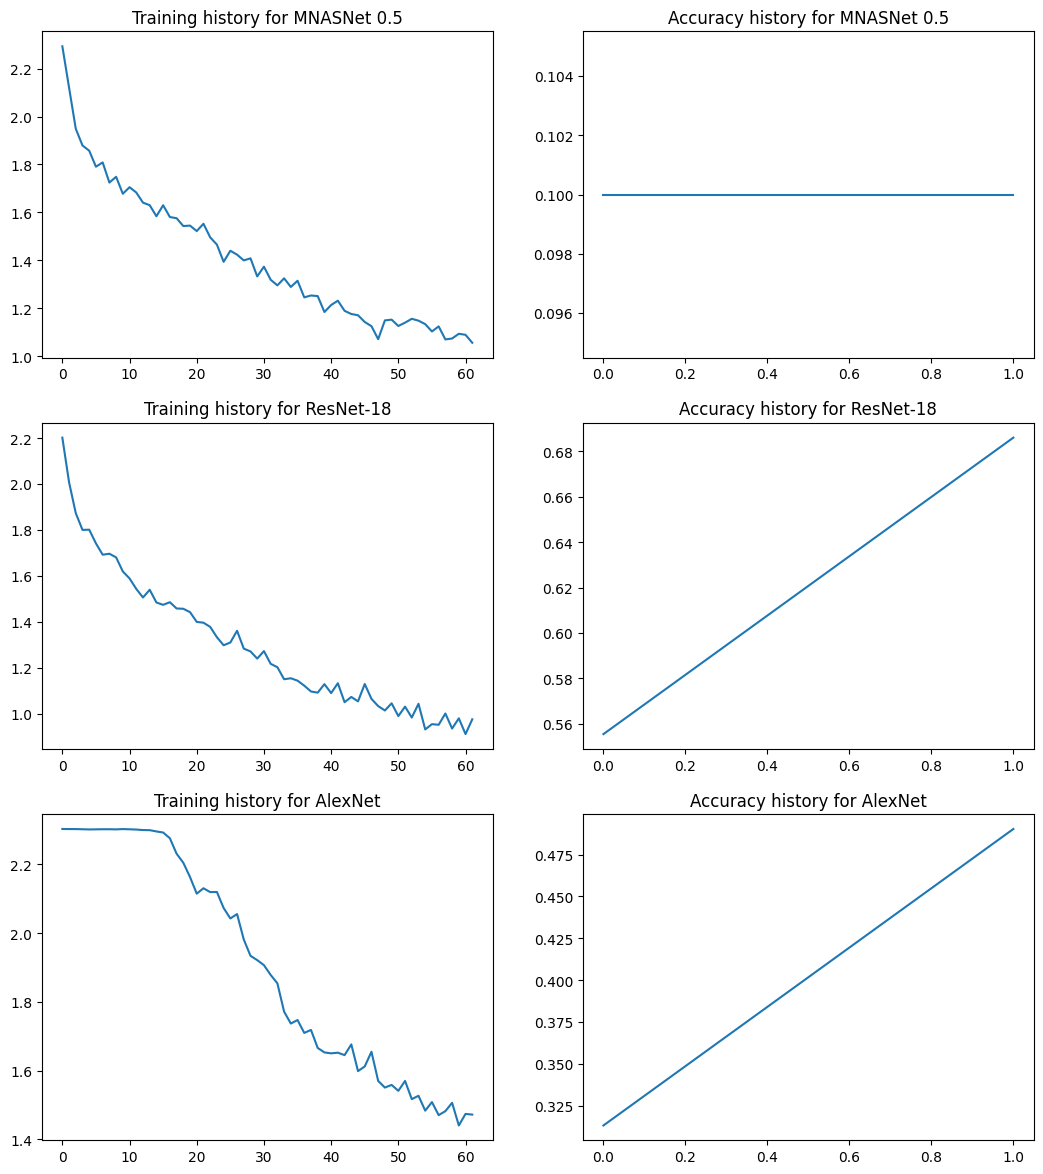

[0.1, 0.1]

In [14]:
fig, axes = plt.subplots(3, 2)
fig.set_size_inches(12.8, 14.4)
ax_train_M, ax_test_M, ax_train_R, ax_test_R, ax_train_A, ax_test_A = axes.flatten()

ax_train_M.plot(train_history_M)
ax_train_M.set_title('Training history for MNASNet 0.5')

ax_test_M.plot(acc_history_M)
ax_test_M.set_title('Accuracy history for MNASNet 0.5')

ax_train_R.plot(train_history_R)
ax_train_R.set_title('Training history for ResNet-18')

ax_test_R.plot(acc_history_R)
ax_test_R.set_title('Accuracy history for ResNet-18')

ax_train_A.plot(train_history_A)
ax_train_A.set_title('Training history for AlexNet')

ax_test_A.plot(acc_history_A)
ax_test_A.set_title('Accuracy history for AlexNet')

plt.show(fig)